# MODUL PyTorch (Python 3.12)

# Vorhersage des Ödometerversuches implementiert
Ziel war die Implementierung eines neuronalen Netzwerks zur Modellierung des Ödometerversuchs. Dabei wurden gegebene Input-Parameter verarbeitet, um Output-Parameter vorherzusagen.

#### Das Problem ist wie folgt definiert:
$$
\begin{array}{rcl}
    \sigma_{t+1} & = & \sigma_{t}+\Delta\sigma \\ \\
    \Delta\sigma & = & E_s\cdot \Delta\epsilon \\ 
    E_s & = & \frac{1+e_0}{C_c} \cdot \sigma_t
\end{array}
\hspace{2cm}
\begin{array}{l}
    \textbf{Annahmen:} \\ \\
    \text{Startwert d. Iteration: } \sigma_t = 1,00 \\ 
    e_0 = 1,00 \\ 
    C_c = 0,005 \\
    \Delta\epsilon = 0,0005
\end{array}
$$

<br> 

Um das Model zu testen werden wir folgende vorberechnete Werte verwenden: `Input` { $\sigma_t$ }, `Output` { $E_s$ }.
<br>
### Variablendeklaration
- $\sigma_t$ = `sigma_t`
- $\Delta\epsilon$ = `delta_epsilon`
- $\sigma_{t+1}$ = `delta_sigma
- $E_s$ = `e_s`

# Generate random trainingsdata

In [41]:
from random import randint

# Define input and output parameters
input_str = "sigma_t"
output_str = "e_s"

# 0 : simple, 1 : improved
oedo_model = 0

# Defining problem parameters
delta_epsilon = -0.0005
C_c = 0.005
e_0 = 1.0
amount_trainings_data = 100

# Data preparation for
oedo_para = {
    "max_n": 1,
    "e_0": e_0,
    "C_c": C_c,
    "delta_epsilon": delta_epsilon,
}

# Load problem and generate trainings data from 00_problem_settings_functions.ipynb

Available classes: `Oedometer` <br>
Returns `list_input` and `list_output` as type `list` <br>
Returns `tensor_input` and `tensor_output` as type `tensor`

In [42]:
from handler.handleData import generate_data
from random import sample

if oedo_model == 0:
    from classes.classOedometerSimple import Oedometer
else:
    from classes.classOedometerSimple import Oedometer
sigma_t_train =  sample(range(-amount_trainings_data * 2,0), amount_trainings_data)

list_input, list_output, tensor_input, tensor_output = generate_data(oedo=oedo_para, oedo_class=Oedometer, sigma_t=sigma_t_train, amount_trainings_data=amount_trainings_data)

# Show trainingsdata (List) as DataFrame
Type `list`: `list_input` and `list_output`

In [43]:
import pandas as pd
from pandas import DataFrame

pd.DataFrame([[input_str] + list_input, [output_str] + list_output])

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,sigma_t,-125.0,-31.0,-108.0,-74.0,-116.0,-12.0,-137.0,-123.0,-192.0,...,-70.0,-7.0,-130.0,-75.0,-35.0,-191.0,-20.0,-155.0,-98.0,-143.0
1,e_s,50000.0,12400.0,43200.0,29600.0,46400.0,4800.0,54800.0,49200.0,76800.0,...,28000.0,2800.0,52000.0,30000.0,14000.0,76400.0,8000.0,62000.0,39200.0,57200.0


# Show trainingsdata (Tensor) as DataFrame
Type `tensor`: `tensor_input` and `tensor_output`

In [44]:
import torch

tensor_input_df = pd.DataFrame(
    torch.cat((tensor_input, tensor_output), dim=1), columns=[input_str, output_str]
)
tensor_input_df

,sigma_t,e_s
0,-125.0,50000.0
1,-31.0,12400.0
2,-108.0,43200.0
3,-74.0,29600.0
4,-116.0,46400.0
...,...,...
95,-191.0,76400.0
96,-20.0,8000.0
97,-155.0,62000.0
98,-98.0,39200.0


# Define SimpleRegressor Model

In [45]:
import torch.nn as nn


class SimpleRegressor(nn.Module):
    def __init__(self):
        super(SimpleRegressor, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)


model = SimpleRegressor()

In [46]:
# import torch.nn as nn
# import torch.optim as optim


# class SimpleRegressor(nn.Module):
#     def __init__(self):
#         super(SimpleRegressor, self).__init__()
#         self.model = nn.Sequential(
#             nn.Linear(1, 16),
#             nn.ReLU(),
#             nn.Linear(16, 16),
#             nn.ReLU(),
#             nn.Linear(16, 1)
#         )

#     def forward(self, x):
#         return self.model(x)

# model = SimpleRegressor()

# Training

In [47]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 100000
loss_history = []
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    pred = model(tensor_input)
    loss = loss_fn(pred, tensor_output)
    loss.backward()
    loss_history.append(loss.item())
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.6f}")

Epoch 0: Loss = 2131822208.000000
Epoch 100: Loss = 2121088896.000000
Epoch 200: Loss = 2110395392.000000
Epoch 300: Loss = 2099741312.000000
Epoch 400: Loss = 2089126656.000000
Epoch 500: Loss = 2078550400.000000
Epoch 600: Loss = 2068012288.000000
Epoch 700: Loss = 2057511424.000000
Epoch 800: Loss = 2047048192.000000
Epoch 900: Loss = 2036621440.000000
Epoch 1000: Loss = 2026230912.000000
Epoch 1100: Loss = 2015875840.000000
Epoch 1200: Loss = 2005556224.000000
Epoch 1300: Loss = 1995271680.000000
Epoch 1400: Loss = 1985021184.000000
Epoch 1500: Loss = 1974805120.000000
Epoch 1600: Loss = 1964622464.000000
Epoch 1700: Loss = 1954473088.000000
Epoch 1800: Loss = 1944356736.000000
Epoch 1900: Loss = 1934272768.000000
Epoch 2000: Loss = 1924221312.000000
Epoch 2100: Loss = 1914201600.000000
Epoch 2200: Loss = 1904213376.000000
Epoch 2300: Loss = 1894256768.000000
Epoch 2400: Loss = 1884330880.000000
Epoch 2500: Loss = 1874435968.000000
Epoch 2600: Loss = 1864571264.000000
Epoch 2700: L

# Loss function

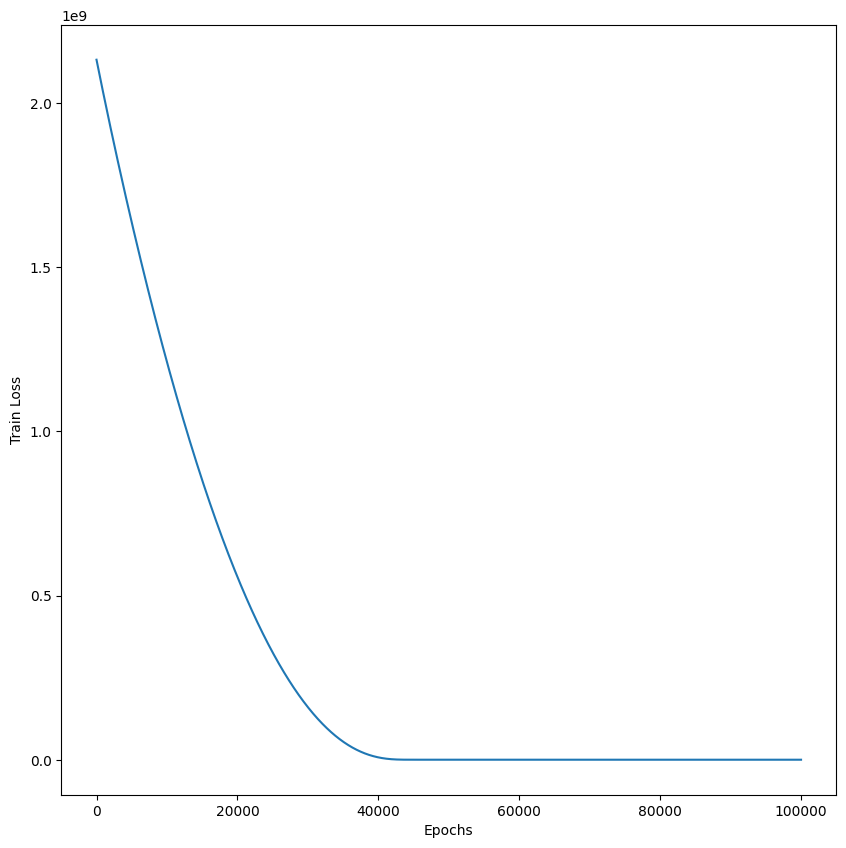

In [48]:
import matplotlib.pyplot as plt

plt.plot(loss_history, label="Loss")
plt.xlabel("Epochs")
plt.ylabel("Train Loss")
plt.show()

# Plot of stress–strain curve

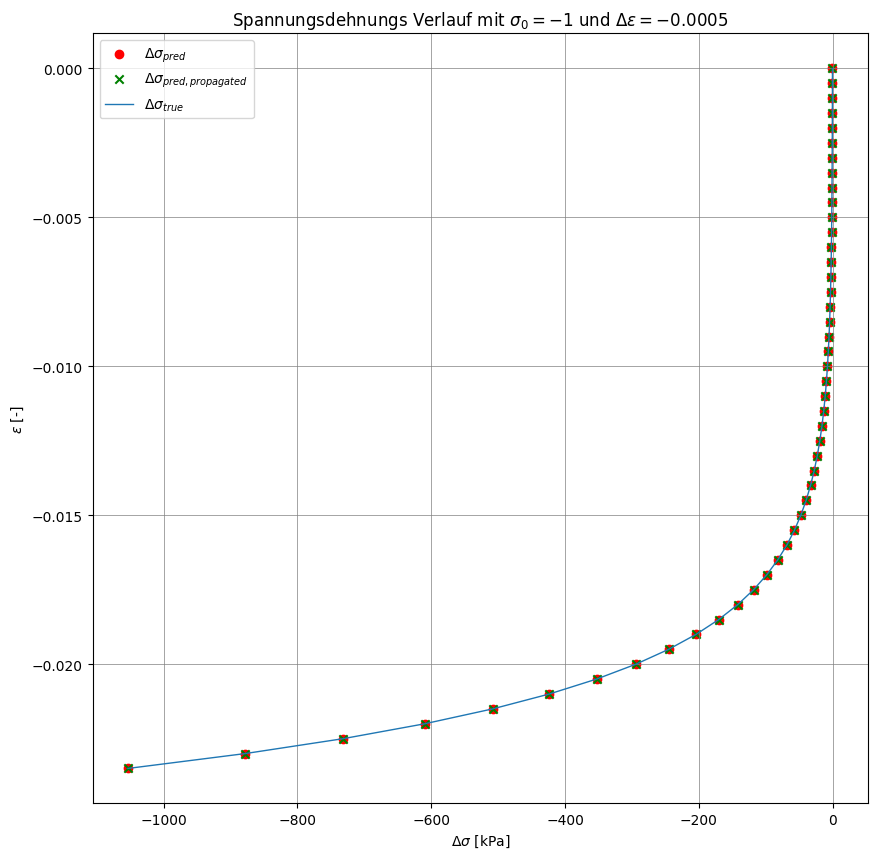

In [49]:
from handler.handleVisuals import plot_result_graph

oedo_para = {
        "max_n": 48,
        "e_0": e_0,
        "C_c": C_c,
        "delta_epsilon": delta_epsilon,
        "sigma_t": -1,
    }

oedo = Oedometer(**oedo_para)

e_s_list, delta_sigma_list = plot_result_graph(model=model, oedo=oedo,iterations=oedo_para["max_n"])

In [50]:
from handler.handleVisuals import plot_result_dataframe
from IPython.display import Markdown, display

plot_result_dataframe(pd, e_s_list, delta_sigma_list)

1.3703320760928561e-06


,"$E_{s,i,true}$","$E_{s,i,pred}$",$\Delta E_s$,|,$\Delta\sigma_{true}$,$\Delta\sigma_{pred}$,$\Delta \sigma$
0,4.000000e+02,4.000000e+02,0.0,|,-0.200000,-0.200000,7.748604e-08
1,4.800000e+02,4.800000e+02,0.0,|,-0.240000,-0.240000,9.894371e-08
2,5.760000e+02,5.760000e+02,0.0,|,-0.288000,-0.288000,7.700920e-08
3,6.912000e+02,6.912000e+02,0.0,|,-0.345600,-0.345600,9.837151e-08
4,8.294400e+02,8.294400e+02,0.0,|,-0.414720,-0.414720,5.844116e-08
5,9.953280e+02,9.953280e+02,0.0,|,-0.497664,-0.497664,1.237736e-07
6,1.194394e+03,1.194394e+03,0.0,|,-0.597197,-0.597197,7.700272e-08
7,1.433272e+03,1.433272e+03,0.0,|,-0.716636,-0.716636,2.087769e-08
8,1.719927e+03,1.719927e+03,0.0,|,-0.859963,-0.859963,8.465787e-08
9,2.063912e+03,2.063912e+03,0.0,|,-1.031956,-1.031956,6.222009e-09
